## Extraction of frames from video

In [1]:
# import cv2
# import math

# cap = cv2.VideoCapture("data/input.mp4")

# i=1

# while(cap.isOpened()):
#     frameId = cap.get(1) #current frame number
#     ret, frame = cap.read()
#     if (frameId % 2400 == 0):
#         filename = "data/image" +  str(i) + ".jpg"
#         cv2.imwrite(filename, frame)
#         i += 1
    
# cap.release()

In [3]:
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np

## Helper function to show images

In [4]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

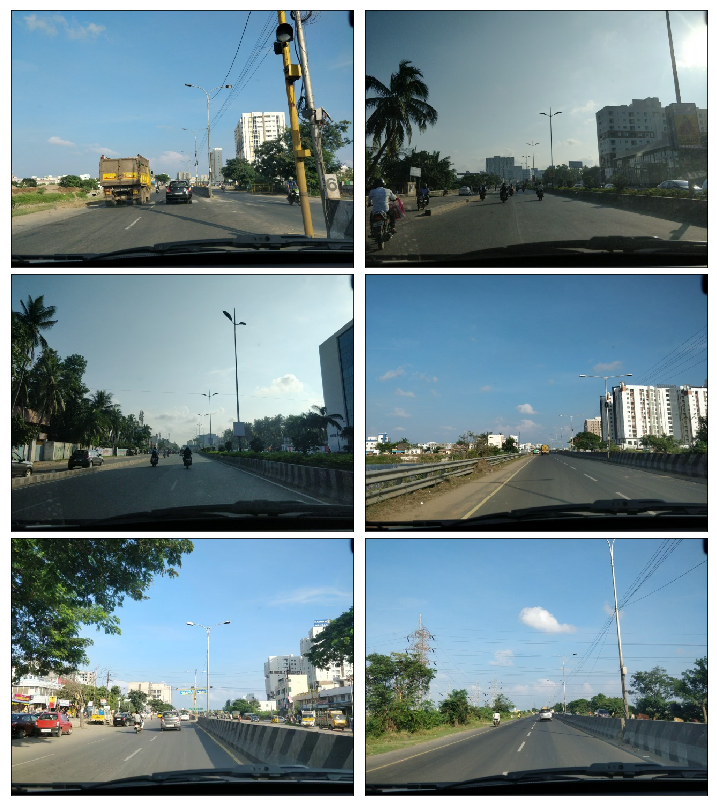

In [5]:
test_images = [plt.imread(path) for path in glob.glob('data/*.jpg')]

show_images(test_images)

## Expirementation with different kinds of Filtering started here

### So that the result can be used to detect proper road edges ( minimizing the noises)

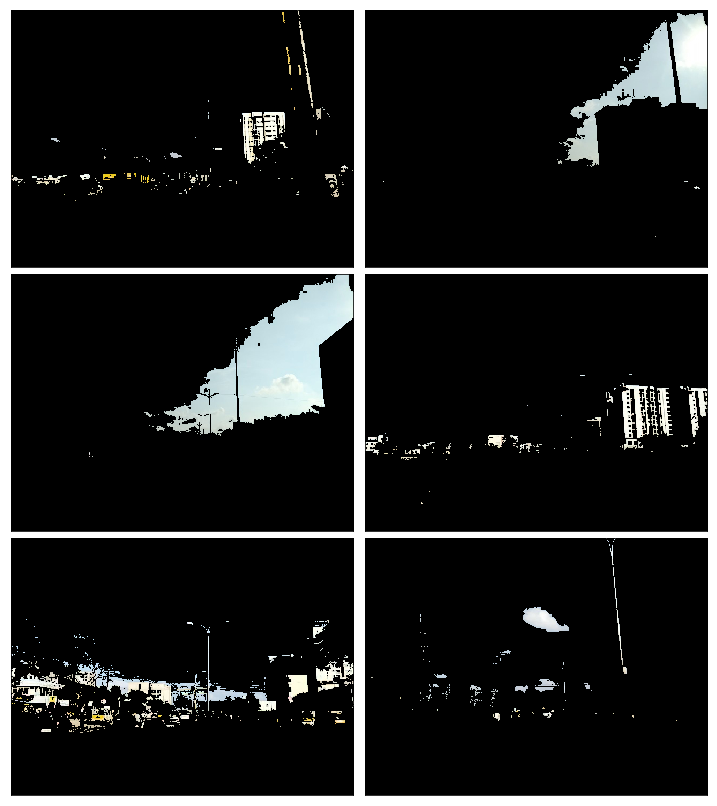

In [6]:
# image is expected be in RGB color space
def select_rgb_white_yellow(image): 
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked

show_images(list(map(select_rgb_white_yellow, test_images)))

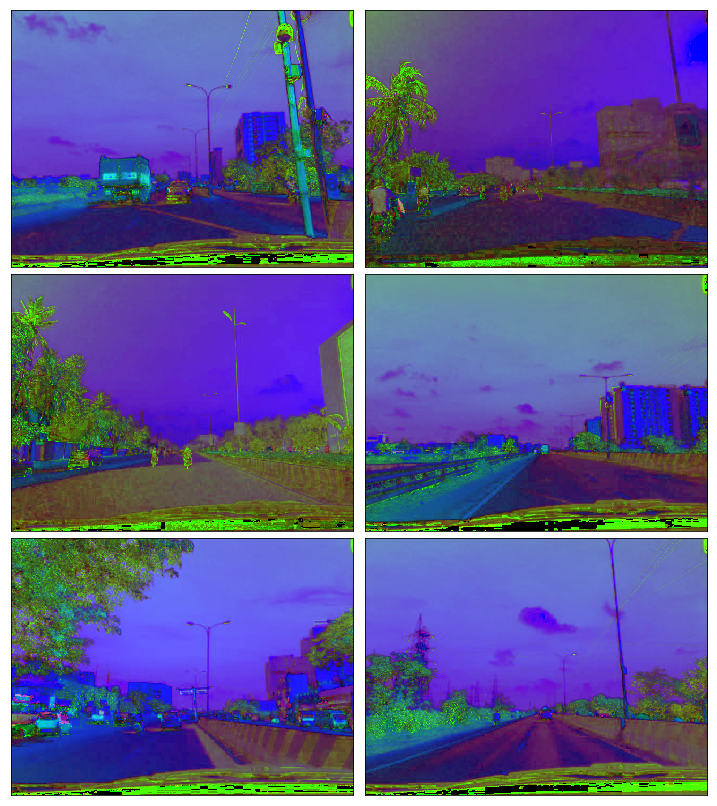

In [7]:
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

show_images(list(map(convert_hsv, test_images)))

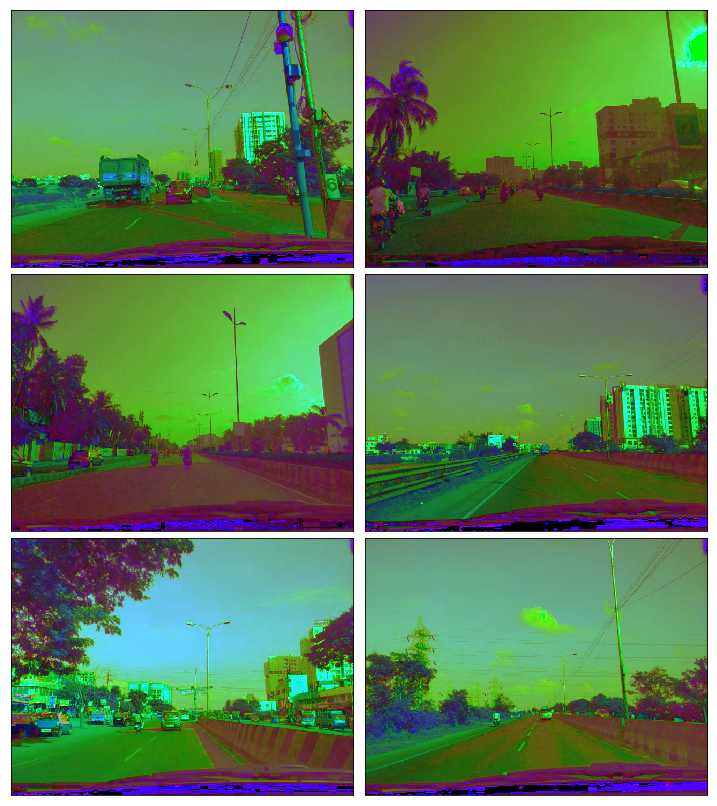

In [8]:


def convert_hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

hls_images = list(map(convert_hls, test_images))
show_images(list(map(convert_hls, test_images)))



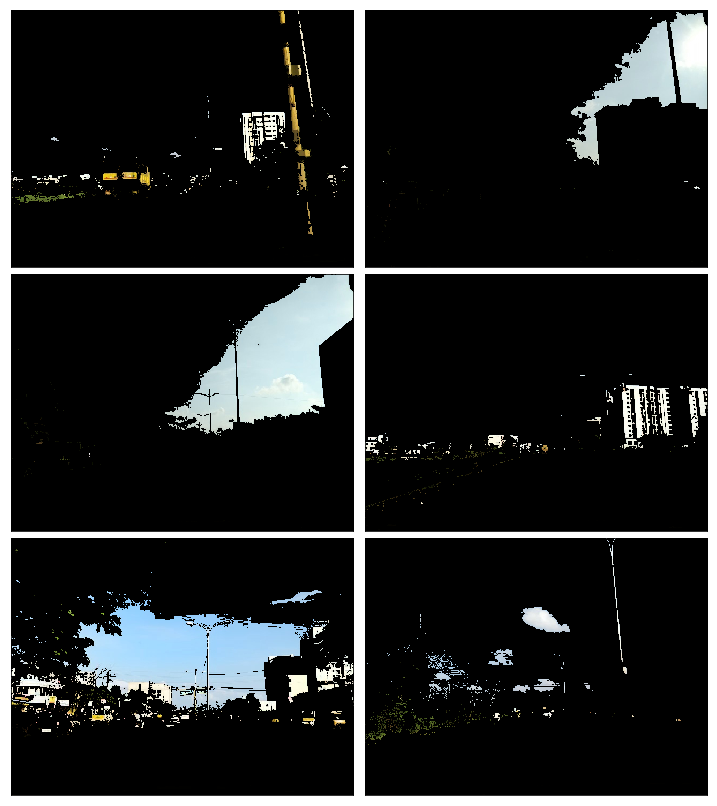

In [9]:
def select_white_yellow(image):
    converted = convert_hls(image)
    # white color mask
    lower = np.uint8([  0, 200,   0])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, lower, upper)
    # yellow color mask
    lower = np.uint8([ 10,   0, 100])
    upper = np.uint8([ 40, 255, 255])
    yellow_mask = cv2.inRange(converted, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    return cv2.bitwise_and(image, image, mask = mask)

white_yellow_images = list(map(select_white_yellow, test_images))

show_images(white_yellow_images)

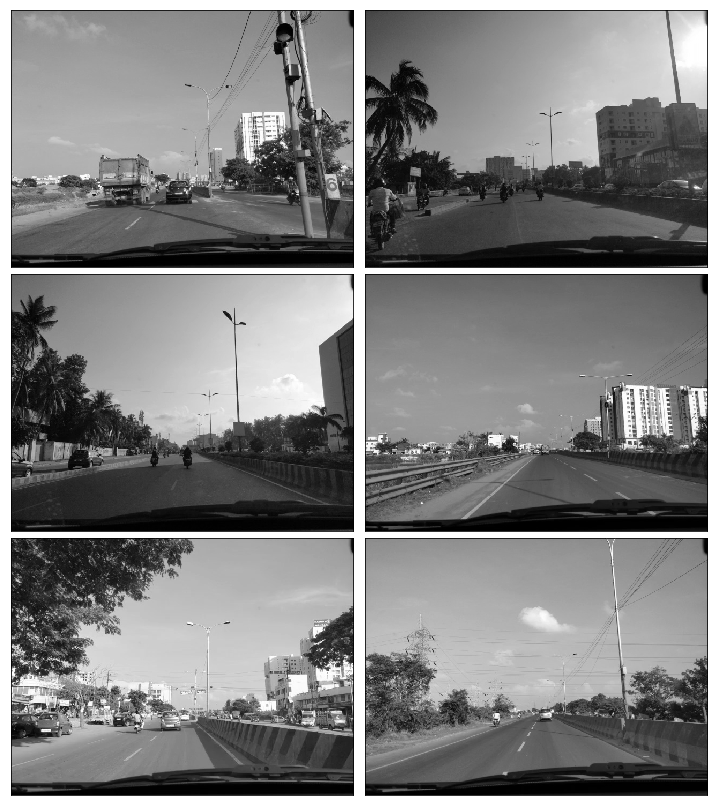

In [10]:
def convert_gray_scale(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     img = cv2.equalizeHist(image)
    return image

gray_images = list(map(convert_gray_scale, test_images))

show_images(gray_images)

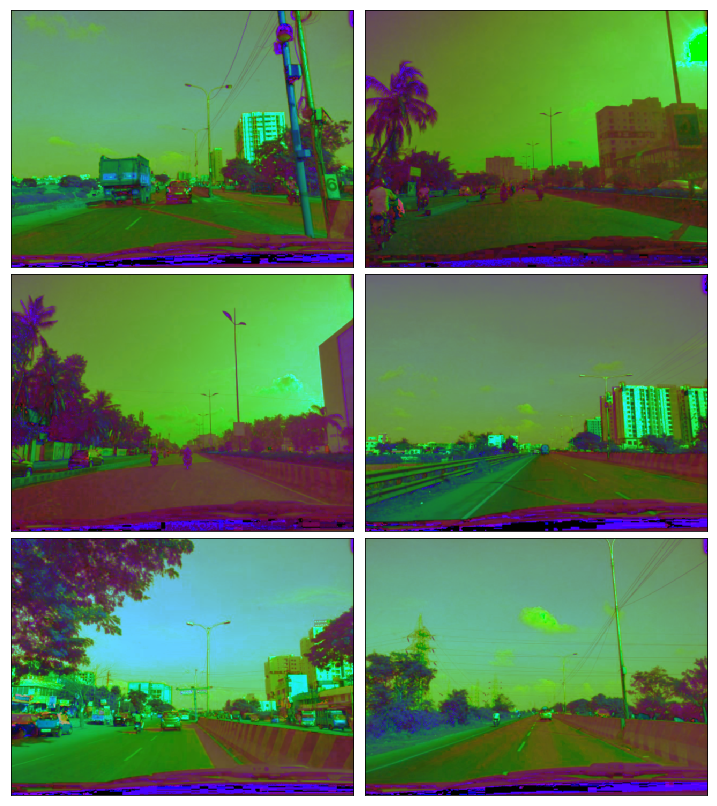

In [11]:
def apply_smoothing(image, kernel_size=3):
    """
    kernel_size must be postivie and odd
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

blurred_images = list(map(lambda image: apply_smoothing(image), hls_images))
show_images(blurred_images)

In [12]:
def apply_filtering(img):
    """
    kernel_size must be postivie and odd
    """
#     gray_lap = cv2.Laplacian(img,cv2.CV_16S)
#     dst = cv2.convertScaleAbs(gray_lap)
#     gray_lap = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
#     dst = cv2.convertScaleAbs(gray_lap)
    image = cv2.adaptiveBilateralFilter(img,ksize=(7,7),sigmaSpace=3)
#     image = cv2.equalizeHist(image);
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(image)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

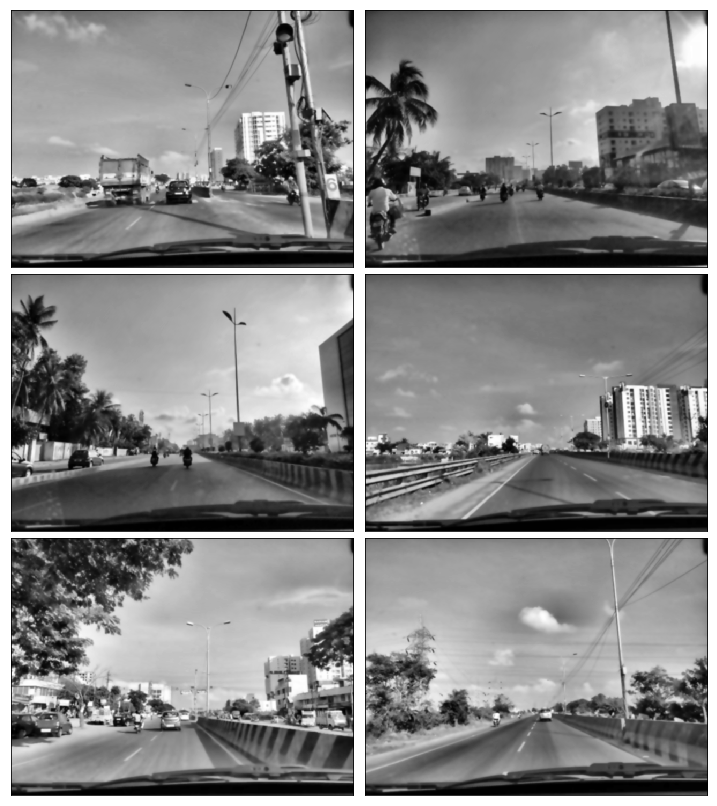

In [13]:
filtered_images = list(map(lambda image: apply_filtering(image), gray_images))

show_images(filtered_images)

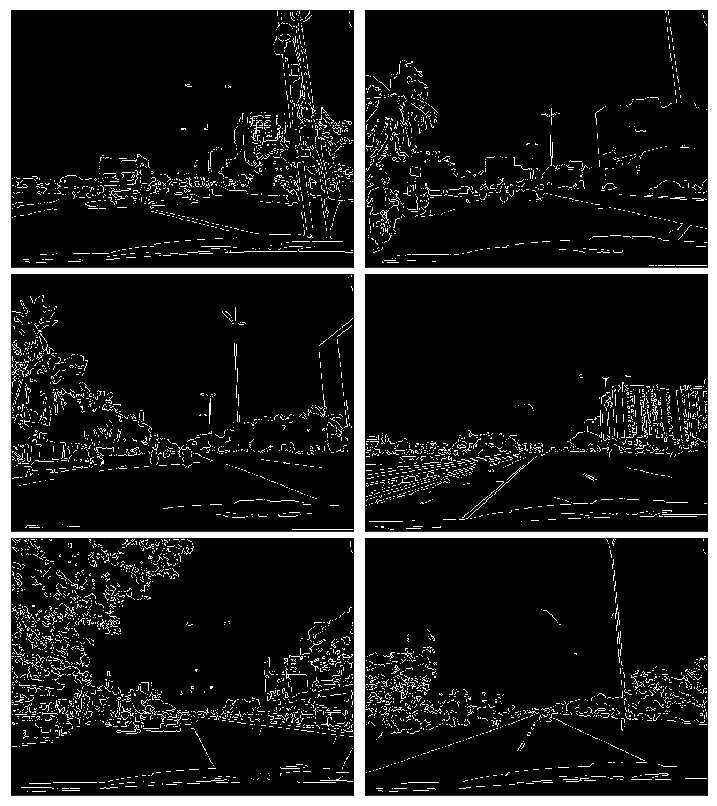

In [15]:
def detect_edges(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper,apertureSize = 3)    
    return edged

edge_images = list(map(lambda image: detect_edges(image), filtered_images))

show_images(edge_images)

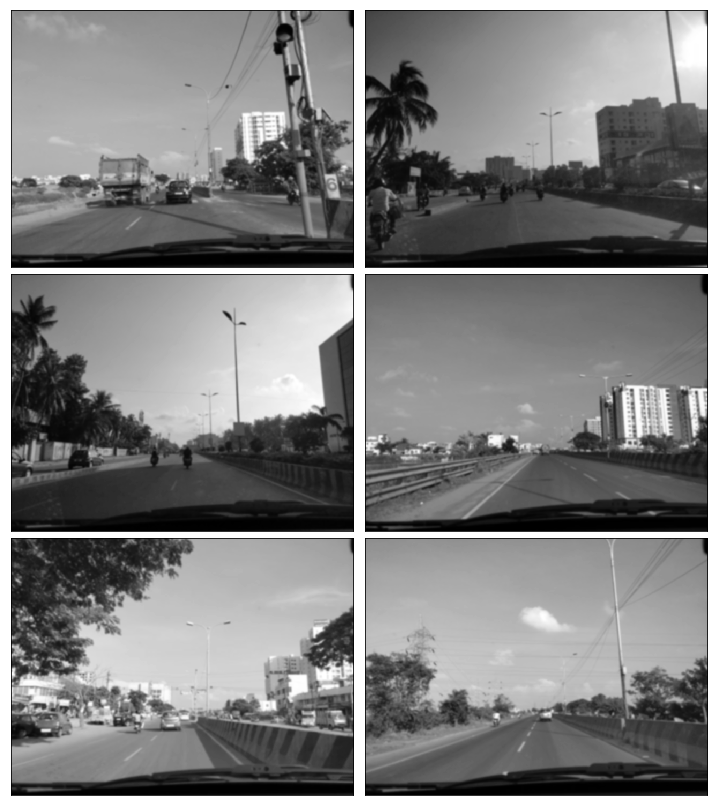

In [16]:
def apply_smoothing(image, kernel_size=7):
    """
    kernel_size must be postivie and odd
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

blurred_images = list(map(lambda image: apply_smoothing(image), gray_images))

show_images(blurred_images)

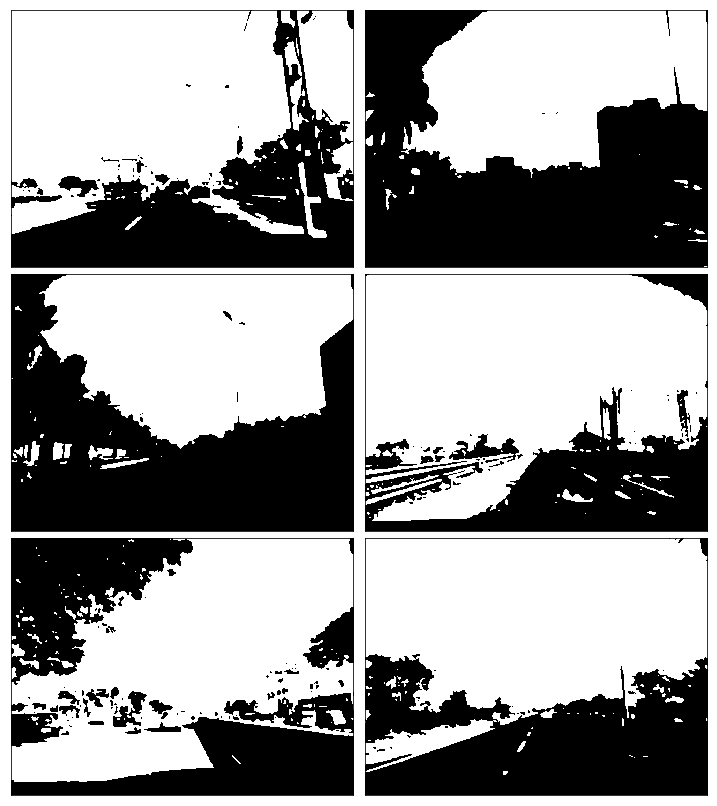

In [17]:
def threshold(image):
    
    ret3,img = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     img = cv2.equalizeHist(img)
    return img

thresholded_images = list(map(threshold, blurred_images))
show_images(thresholded_images)

In [18]:
def convert_gray_scale(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return img

gray_images = list(map(convert_gray_scale, test_images))

# show_images(gray_images)

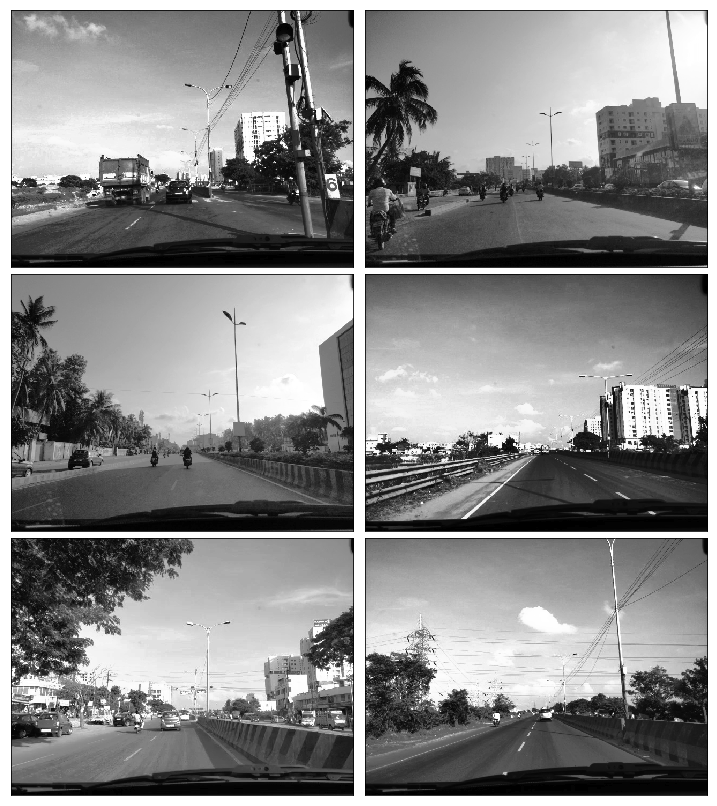

In [19]:
def apply_filtering(img):
    """
    kernel_size must be postivie and odd
    """
    return cv2.equalizeHist(img)


filtered_images = list(map(lambda image: apply_filtering(image), gray_images))

show_images(filtered_images)

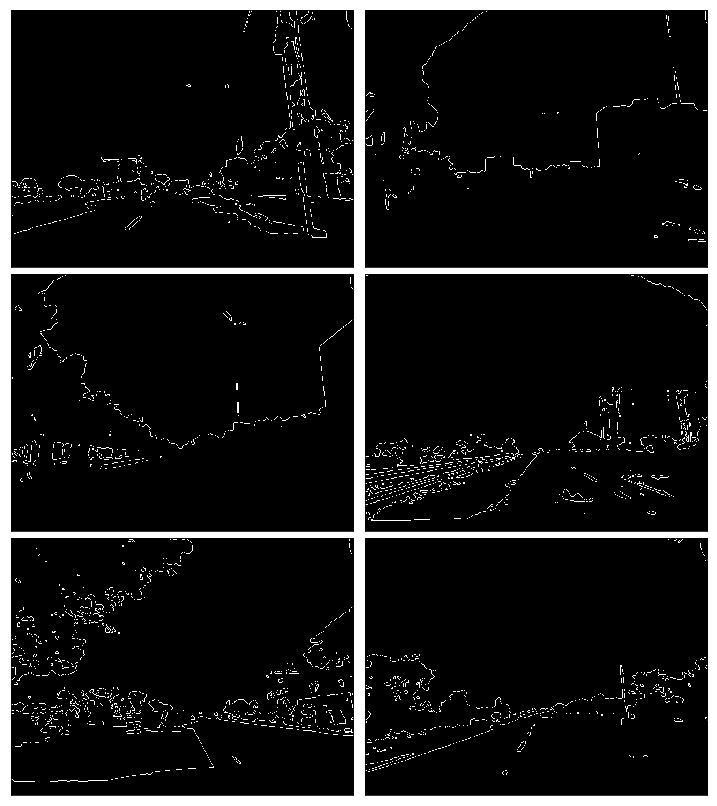

In [20]:
def detect_edges(image,sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper,apertureSize = 3)
    
    return edged

edge_images = list(map(lambda image: detect_edges(image), thresholded_images))

show_images(edge_images)

## Testing on video

In [17]:
cap = cv2.VideoCapture('data/input.mp4')

fourcc = cv2.cv.CV_FOURCC(*'XVID')
out = cv2.VideoWriter('data/output_vid.avi',fourcc, 30.0,(int(cap.get(3)),int(cap.get(4))),False)

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.equalizeHist(frame)
    frame = cv2.GaussianBlur(frame, (7,7), 0)
    ret3,image = cv2.threshold(frame,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    edges = detect_edges(image)
    out.write(edges)    
    if ret==True:
        cv2.imshow('frame',edges)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
    

# We stopped here, and thought to proceed with the improvements in approach one , since the problem with excess noise and absent lane markings cannot be eliminated by this approach (even after applying ROI).